# Homestay Price At Seatle Investigation

<ul>
<li><a href="#overview">Project overview</a></li>
<li><a href="#bussiness_understanding">Bussiness Understanding</a></li>
<li><a href="#data_understanding">Data Understanding</a></li>
<li><a href="#prepare">Prepare Data</a></li>
<li><a href="#evaluate">Evaluate the Results</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#deploy">Deploy</a></li>
</ul>

<a id='overview'></a>
## Project overview
    Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. The following Airbnb activity is included in this Seattle dataset:
    - Listings, including full descriptions and average review score
    - Reviews, including unique id for each reviewer and detailed comments
    - Calendar, including listing id and the price and availability for that day
    In this project i would like to use only listings.csv file for my investigation.

<a id='bussiness_understanding'></a>
### Bussiness Understanding:
    When investigating with seatle data, i'm most interested in checking price of homestay to know about all characteristics affected to the price. So, my questions are:
    - which quatities affect to price and what is the most affected to price ?
    - how kind of neighbourhood_group_cleansed affected to price. which has the most price.
    - how kind of homestay affected to price. which has the most price.
    - how kind of room type affected to price. which has the most price.

<a id='data_understanding'></a>
### Data Understanding:
    As mentioned above, i will use listings dataset. this data included 3818 and 92 columns included quantitical columns and categorical columns. For this huge of columns that make more difficult to statistic and maybe some columns not good for my investigation, i prefer to clone to new dataset with some columns which i feel will be good for my investigation.

<a id='prepare'></a>
### Prepare Data
    In this step, i will read listings data, then create new dataset with expected columns. The data has missed values,so i will clean data by fill value or remove missed data. After that, i will convert datatype of price column to number.

**import library and read dataset from csv file**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./listings.csv')

df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [2]:
print(df.columns)
df.shape

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

(3818, 92)

**create new dataset by copy from original dataset then remove unwanted columns.**

In [3]:
df_new = df.copy()
dropped_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'square_feet','weekly_price', 'monthly_price',
       'minimum_nights','accommodates','amenities',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
       'first_review', 'last_review', 'requires_license','number_of_reviews', 'review_scores_rating',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']
df_new.drop(dropped_columns, axis=1, inplace=True)
df_new.head()

neighbourhood_group_cleansed property_type        room_type  bathrooms  \
0                   Queen Anne     Apartment  Entire home/apt        1.0   
1                   Queen Anne     Apartment  Entire home/apt        1.0   
2                   Queen Anne         House  Entire home/apt        4.5   
3                   Queen Anne     Apartment  Entire home/apt        1.0   
4                   Queen Anne         House  Entire home/apt        2.0   

   bedrooms  beds  bed_type    price security_deposit cleaning_fee  \
0       1.0   1.0  Real Bed   $85.00              NaN          NaN   
1       1.0   1.0  Real Bed  $150.00          $100.00       $40.00   
2       5.0   7.0  Real Bed  $975.00        $1,000.00      $300.00   
3       0.0   2.0  Real Bed  $100.00              NaN          NaN   
4       3.0   3.0  Real Bed  $450.00          $700.00      $125.00   

   guests_included extra_people  
0                2        $5.00  
1                1        $0.00  
2               10       $25.00  
3                1        $0.00  
4                6       $15.00

Now we have new dataset look simple for analysis. The fist thing i look for overal of this dataset.

In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3818 non-null   object 
 1   property_type                 3817 non-null   object 
 2   room_type                     3818 non-null   object 
 3   bathrooms                     3802 non-null   float64
 4   bedrooms                      3812 non-null   float64
 5   beds                          3817 non-null   float64
 6   bed_type                      3818 non-null   object 
 7   price                         3818 non-null   object 
 8   security_deposit              1866 non-null   object 
 9   cleaning_fee                  2788 non-null   object 
 10  guests_included               3818 non-null   int64  
 11  extra_people                  3818 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 358.1+ KB


There are many columns have missed value. I distinguish them to 2 types. One type is we can fill data and other is we can remove them. The first is for property_type, bathrooms, bedrooms, beds. Missed value is no information and it's not good for analysis. So i will remove it. The second is for columns: security_deposit, cleaning_fee, review_scores_rating. In this case we fill missed value with 0 because we can agree with security_deposit, cleaning_fee are free and review_scores_rate = 0.

So, the first thing, i will remove missed values

In [5]:
df_new.dropna(subset=['property_type','bathrooms', 'bedrooms', 'beds'], how='any', inplace=True)

The second, i will fill missed value with 0 for other columns.

In [6]:
fill_zero = lambda col: col.fillna(0)
df_new = df_new.apply(fill_zero, axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3817
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3795 non-null   object 
 1   property_type                 3795 non-null   object 
 2   room_type                     3795 non-null   object 
 3   bathrooms                     3795 non-null   float64
 4   bedrooms                      3795 non-null   float64
 5   beds                          3795 non-null   float64
 6   bed_type                      3795 non-null   object 
 7   price                         3795 non-null   object 
 8   security_deposit              3795 non-null   object 
 9   cleaning_fee                  3795 non-null   object 
 10  guests_included               3795 non-null   int64  
 11  extra_people                  3795 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 385.4+ KB


Now, i will convert price to number value.


In [7]:
convert_price = lambda col: col.str.replace('$','')
df_new['price'] = df_new['price'].str.replace('[^\d.]', '', regex=True)
df_new["price"] = pd.to_numeric(df_new["price"])

Now, we have tidy dataset with two types of variables: quantitical variable and categorical variable. Quantitical variables are bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee, guests_included, extra_people. Categorical variables are neighbourhood_group_cleansed, property_type, room_type.

<a id='evaluate'></a>
### Evaluate & Result
    In this step, i will do some investigate to answer bussiness questions.

Now, i will use heatmap chart to check correlation between quantitical variables.

<AxesSubplot:>

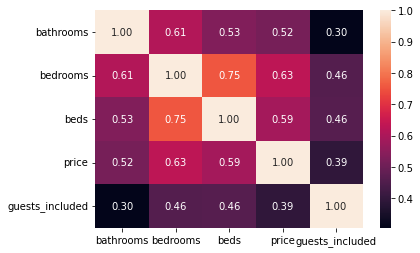

In [8]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f")

Look at the headmap above we see that some properties affected to price are bathrooms, bedrooms, beds, guests_included. The most affected propery is bedrooms.

We will check correlation between most effected property, bedrooms with price.

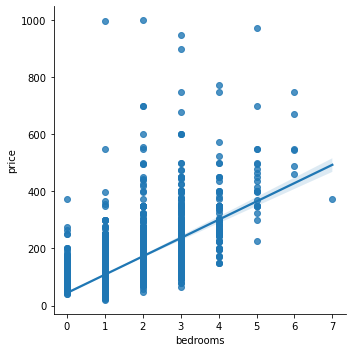

In [9]:
sns.lmplot(x='bedrooms', y='price', data=df_new)

As the chart, correlation between bedrooms with prices is linear. When bedrooms increases, price increases and vice verse.

Next we will check correlations between categorical variable with price.


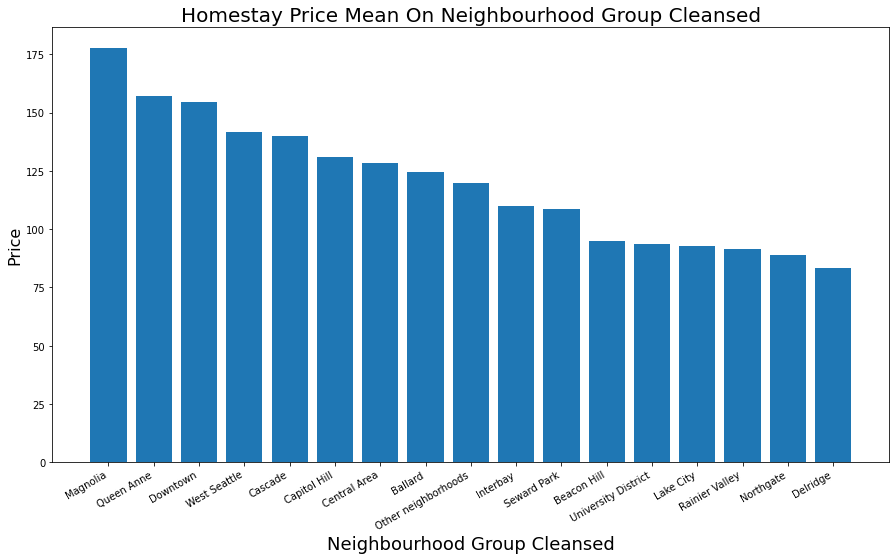

In [10]:
def draw_barchart(df, title, xlabel, ylabel, rotate):
    """ This function is to draw barchart for dataset input. """
    plt.figure(figsize = [15, 8])
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(rotation=30, ha='right')
    plt.bar(df[df.columns[0]], df[df.columns[1]] )
    plt.show()
df1 = df_new.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
df1 = df1.reset_index()
draw_barchart(df1, 'Homestay Price Mean On Neighbourhood Group Cleansed','Neighbourhood Group Cleansed', 'Price', 30 )
# plt.bar(df1['neighbourhood_group_cleansed'], df1['price'] )
# plt.xticks(rotation=30, ha='right')
# fig.suptitle('test title', fontsize=20)
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# plt.show()

The chart show that neighbourhood group = Magnolia has higest price.

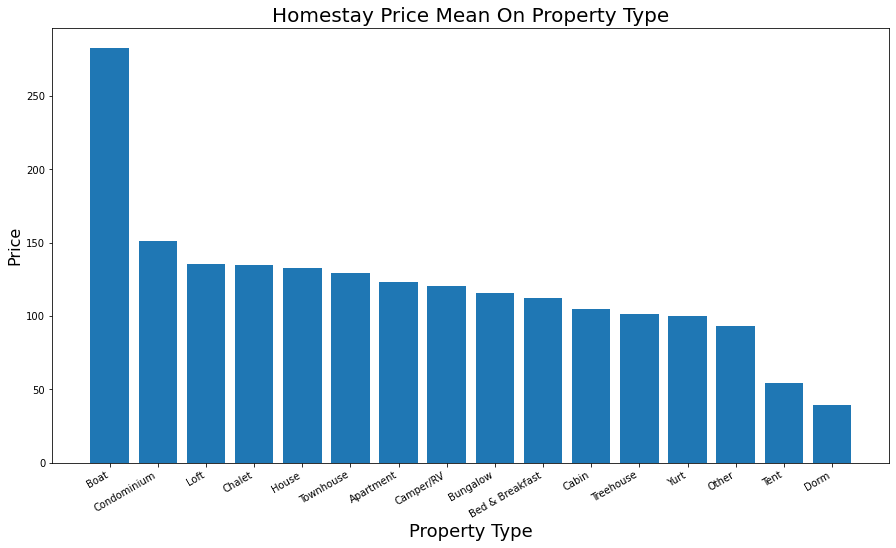

In [11]:

df2 = df_new.groupby('property_type').mean()['price'].sort_values(ascending=False)
df2 = df2.reset_index()
# plt.xticks(rotation=30, ha='right')
# df2.plot(kind='bar')
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# plt.show()
draw_barchart(df2,'Homestay Price Mean On Property Type', 'Property Type', 'Price', 30)

The chart show that homestay with property type = Boat has higest price.

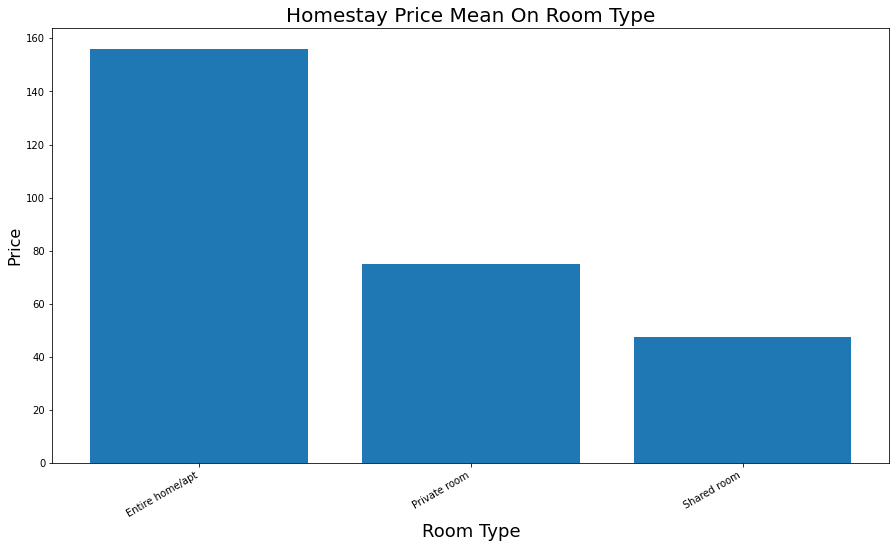

In [12]:
df3 = df_new.groupby('room_type').mean()['price'].sort_values(ascending=False)
df3 = df3.reset_index()
# plt.xticks(rotation=30, ha='right')
# df3.plot(kind='bar')
draw_barchart(df3,'Homestay Price Mean On Room Type', 'Room Type', 'Price', 30)

The chart show that room type = Entire home/apt has highest price.

<a id='conclusion'></a>
### Conclusion:
    Now we can conclude as following:
        - The price of homestay in Seattle are affected by properties bathrooms, bedrooms, beds, guests_included. The most affected property is bedrooms. This variable correlates with price linear. When the bedrooms increases, it will lead  to price increase.
        - Homestay have neighbourhood_group_cleansed = Magnolia has the highest price
        - Homestay have property type = boat has the highest price.
        - Homestays have room type = Entire home/apt has the highest price.

<a id='deploy'></a>
### Deploy
    deploy to local server by command:
        !jupyter nbconvert seattle_airbnb.ipynb --to slides --post serve --no-input --no-prompt

In [25]:
# Use this command if you are running this file in local
!jupyter nbconvert seattle_airbnb.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook seattle_airbnb.ipynb to slides
[NbConvertApp] Writing 741197 bytes to seattle_airbnb.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/seattle_airbnb.slides.html
Use Control-C to stop this server
^C

Interrupted
